<h2>Import bibliotek</h2>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp

<h2>Zadanie 1.</h2>

Definicja funkcji

In [6]:
# function definition
def f(x):
    return 4 / (1 + x**2)

Definicja formuł obliczających pola pod wykresem

In [7]:
# midpoint rectangular formula
def rect(a, b, f):
    return (b-a) * f((a+b)/2)

# trapezoidal formula
def trap(a, b, f):
    return (b-a)/2 * (f(a) + f(b))

# Simpson formula
def simp(a, b, f):
    return (b-a)/6 * (f(a) + 4*f((a+b)/2) + f(b))

Funkcja generujące odcięte węzłów

In [8]:
# generate uniform nodes xs
def uniform_xs(range_start, range_end, count):
    return np.linspace(range_start, range_end, count)

Funkcja obliczająca wartość całki oznaczonej

In [10]:
# calculate integral
def integral(f, nodes, formula):
    return np.sum(formula(nodes[:-1], nodes[1:], f))

<h3>a) Całka dla wszystkich trzech formuł i $2^m + 1$ równoodległych węzłów, $m = 1,2,...,25$</h3>

Definicja zbioru węzłów

In [31]:
# define ms
ms = np.arange(1, 26, 1)

# nodes array
nodes_xs = [uniform_xs(0, 1, 2**m + 1) for m in ms]

Obliczenie wartości w zależności od $m$ i formuły

In [35]:
# midpoint rectangular formula values
rect_values = np.array([integral(f, xs, rect) for xs in nodes_xs])
# trapezoidal formula values
trap_values = np.array([integral(f, xs, trap) for xs in nodes_xs])
# Simpson formula values
simp_values = np.array([integral(f, xs, simp) for xs in nodes_xs])

Obliczenie wartości błędu względnego dla otrzymanych wartości

In [36]:
# midpoint rectangular formula errors
rect_errors = np.pi - rect_values
# trapezoidal formula errors
trap_errors = np.pi - trap_values
# Simpson formula errors
simp_errors = np.pi - simp_values

Narysowanie bezwzględnej wartości błędu względnego w zależności od liczby ewaluacji podcałkowych

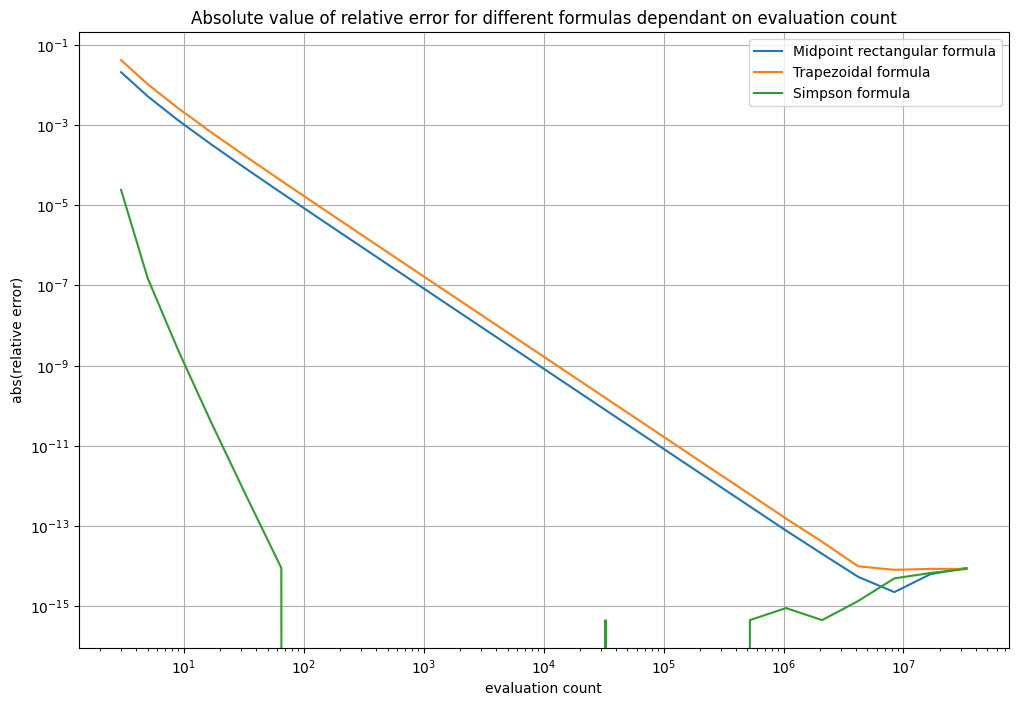

In [58]:
# set figsize
plt.figure(figsize = (12,8))
# plot rect errors
plt.plot(2**ms + 1, np.abs(rect_errors), label="Midpoint rectangular formula")
# plot trap errors
plt.plot(2**ms + 1, np.abs(trap_errors), label="Trapezoidal formula")
# plot simp errors
plt.plot(2**ms + 1, np.abs(simp_errors), label="Simpson formula")
# set title and axes names
plt.title("Absolute value of relative error for different formulas dependant on evaluation count")
plt.xlabel("evaluation count")
plt.ylabel("abs(relative error)")
# set both axes to logarithmic scales
plt.xscale("log")
plt.yscale("log")
# show plot with grid and legend
plt.grid()
plt.legend()
plt.show()